In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
dataset = pd.read_excel('/content/transactions.xlsx')
print(dataset.head())

   Transaction_ID                 Date       Customer_Name  Total_Items  \
0      1000667075  2022-09-12 17:40:23          David King            5   
1      1000156022  2022-01-20 23:03:20  Michael Williamson            3   
2      1000681674  2022-10-15 07:49:59       Chelsea Garza            7   
3      1000692089  2024-04-05 09:39:58         Scott Lopez            5   
4      1000328702  2021-05-28 04:16:54       Crystal Adams            4   

   Amount($)  Payment_Method     City         Store_Type  Discount_Applied  \
0      30.98      Debit Card  Chicago     Warehouse Club              True   
1      23.29     Credit Card   Boston     Warehouse Club              True   
2      25.62      Debit Card  Chicago           Pharmacy             False   
3      14.64  Mobile Payment  Atlanta           Pharmacy             False   
4      62.27     Credit Card    Miami  Convenience Store             False   

  Customer_Category  Season                   Promotion  
0          Teenager   

In [ ]:
print(dataset.info())  # Check data types, missing values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB
None


In [ ]:
print(dataset.describe())  # Get a summary of numerical features

       Transaction_ID   Total_Items     Amount($)
count    3.850000e+04  38500.000000  38500.000000
mean     1.000500e+09      5.490649     52.459843
std      2.890708e+05      2.868476     27.442214
min      1.000000e+09      1.000000      5.000000
25%      1.000248e+09      3.000000     28.760000
50%      1.000501e+09      5.000000     52.260000
75%      1.000751e+09      8.000000     76.350000
max      1.001000e+09     10.000000    100.000000


In [ ]:
dataset.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_Name,0
Total_Items,0
Amount($),0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,0
Customer_Category,0


In [ ]:
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")

In [ ]:
dataset.to_excel('Preprocessed_transactions.xlsx', index=False)

print("Excel file has been saved.")

Excel file has been saved.


In [ ]:
print(dataset.head())

   Transaction_ID                 Date       Customer_Name  Total_Items  \
0      1000667075  2022-09-12 17:40:23          David King            5   
1      1000156022  2022-01-20 23:03:20  Michael Williamson            3   
2      1000681674  2022-10-15 07:49:59       Chelsea Garza            7   
3      1000692089  2024-04-05 09:39:58         Scott Lopez            5   
4      1000328702  2021-05-28 04:16:54       Crystal Adams            4   

   Amount($)  Payment_Method     City         Store_Type  Discount_Applied  \
0      30.98      Debit Card  Chicago     Warehouse Club              True   
1      23.29     Credit Card   Boston     Warehouse Club              True   
2      25.62      Debit Card  Chicago           Pharmacy             False   
3      14.64  Mobile Payment  Atlanta           Pharmacy             False   
4      62.27     Credit Card    Miami  Convenience Store             False   

  Customer_Category  Season                   Promotion  
0          Teenager   

Warehouse Club
       Transaction_ID  Total_Items    Amount($)
count    6.495000e+03  6495.000000  6495.000000
mean     1.000505e+09     5.513780    52.109283
std      2.897796e+05     2.834261    27.780421
min      1.000000e+09     1.000000     5.000000
25%      1.000249e+09     3.000000    27.695000
50%      1.000513e+09     6.000000    51.560000
75%      1.000755e+09     8.000000    76.675000
max      1.001000e+09    10.000000   100.000000
Mean Price: 52.10928252501925
--------------------------------------------------------
Pharmacy
       Transaction_ID  Total_Items    Amount($)
count    6.447000e+03  6447.000000  6447.000000
mean     1.000501e+09     5.479758    52.526439
std      2.914935e+05     2.869947    27.378968
min      1.000000e+09     1.000000     5.060000
25%      1.000248e+09     3.000000    28.925000
50%      1.000500e+09     5.000000    52.590000
75%      1.000757e+09     8.000000    76.335000
max      1.001000e+09    10.000000    99.990000
Mean Price: 52.5264386536

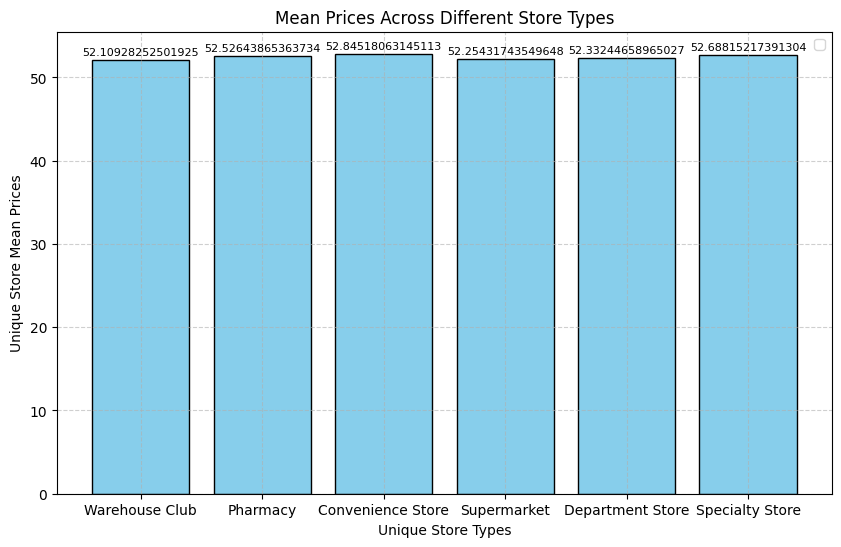

In [ ]:
unique_store_types = dataset['Store_Type'].unique()
unique_store_mean_prices = []
#print(unique_store_types)
for i in unique_store_types:
  print(i)
  filtered_data_i = dataset[dataset['Store_Type'] == i]
  print(filtered_data_i.describe())
  mean_price = filtered_data_i['Amount($)'].mean()
  print("Mean Price:", mean_price)
  unique_store_mean_prices.append(mean_price)
  print("--------------------------------------------------------")


# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_store_types, unique_store_mean_prices, color='skyblue', edgecolor='black')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (which represents the value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3,  # x position and y position slightly above the bar
             f'{yval}', ha='center', va='bottom', fontsize=8)  # Display the value

# Labeling the axes and the title
plt.xlabel('Unique Store Types')  # Label for x-axis
plt.ylabel('Unique Store Mean Prices')  # Label for y-axis
plt.title('Mean Prices Across Different Store Types')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Optional grid
plt.legend()  # Add a legend (can be omitted if not required)
plt.show()




Key Insights:


*   The convenience store has the highest mean price but the mean prices of the different stores are very close to each other and we can say that the category of the stores have very little to dictate how the mean prices would vary.



In [ ]:
unique_seasons = dataset['Season'].unique()
unique_store_types = dataset['Store_Type'].unique()
unique_store_mean_prices_season = {}

for i in unique_store_types:
    print(" ")
    print(f'                     {i}')
    print(" ")

    # Filter data for the current store type
    filtered_data_i = dataset[dataset['Store_Type'] == i]

    # Initialize a nested dictionary for the store type if not already present
    unique_store_mean_prices_season.setdefault(i, {})

    for j in unique_seasons:
        print(j)

        # Filter data for the current season
        filtered_data_j = filtered_data_i[filtered_data_i['Season'] == j]

        print(filtered_data_j.describe())

        # Calculate the mean price for the current store type and season
        mean_price = filtered_data_j['Amount($)'].mean()

        print("Mean Price:", mean_price)

        # Update the nested dictionary
        unique_store_mean_prices_season[i][j] = mean_price

        print("--------------------------------------------------------")
    print("==============================================================================================================================================")
    print("==============================================================================================================================================")

# Print the final dictionary
print(unique_store_mean_prices_season)

 
                     Warehouse Club
 
Fall
       Transaction_ID  Total_Items    Amount($)
count    1.607000e+03  1607.000000  1607.000000
mean     1.000496e+09     5.492844    52.027853
std      2.929996e+05     2.788482    27.359037
min      1.000002e+09     1.000000     5.000000
25%      1.000228e+09     3.000000    28.215000
50%      1.000498e+09     6.000000    51.760000
75%      1.000753e+09     8.000000    76.205000
max      1.000999e+09    10.000000    99.830000
Mean Price: 52.02785314250156
--------------------------------------------------------
Winter
       Transaction_ID  Total_Items    Amount($)
count    1.672000e+03  1672.000000  1672.000000
mean     1.000505e+09     5.625598    51.818594
std      2.873930e+05     2.834728    27.518218
min      1.000000e+09     1.000000     5.070000
25%      1.000254e+09     3.000000    28.337500
50%      1.000517e+09     6.000000    50.725000
75%      1.000754e+09     8.000000    75.277500
max      1.001000e+09    10.000000    99.9500

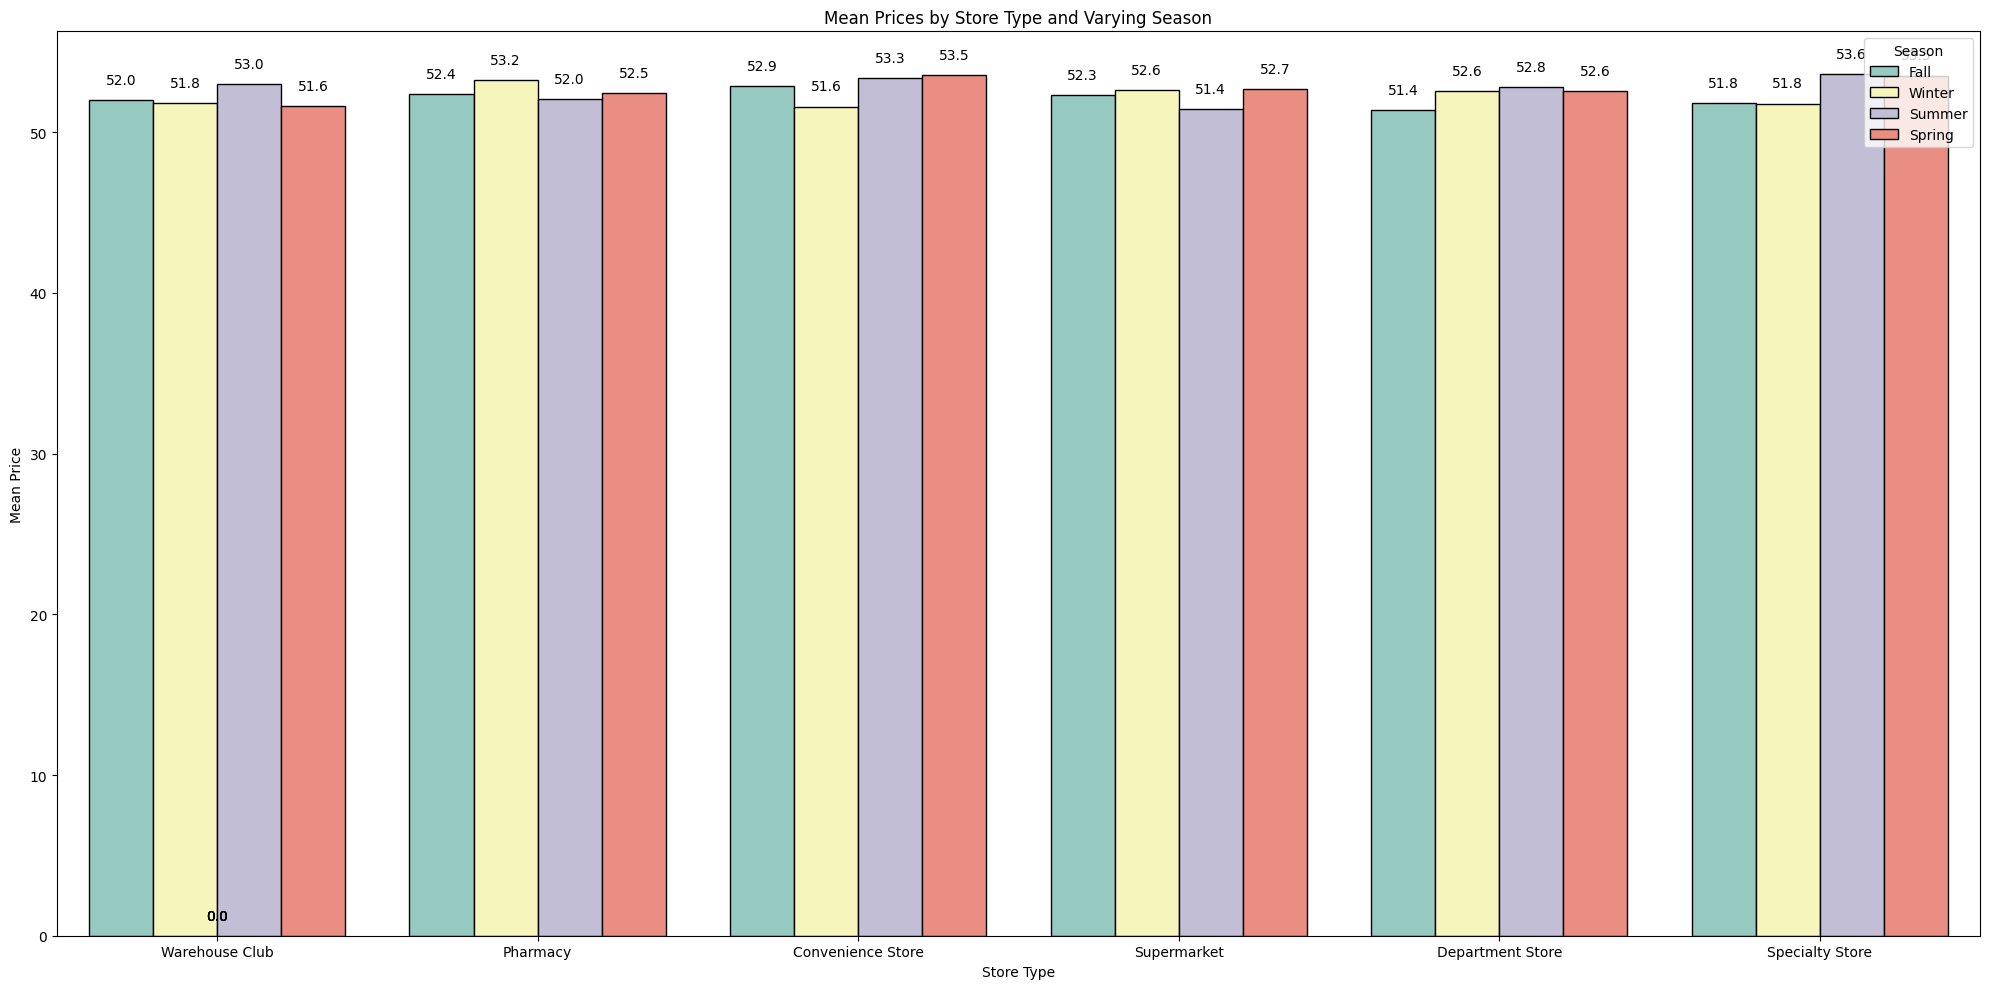

In [ ]:
# Flatten the nested dictionary into a DataFrame
data = []
for store_type, seasons in unique_store_mean_prices_season.items():
    for season, mean_price in seasons.items():
        data.append({'Store_Type': store_type, 'Season': season, 'Mean_Price': mean_price})

df = pd.DataFrame(data)

# Create the bar plot with Store_Type on the x-axis
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df, x='Store_Type', y='Mean_Price', hue='Season', edgecolor='black', palette='Set3')

# Annotate each bar with its mean value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar_height + 1,                    # Y-coordinate (just above the bar)
        f'{bar_height:.1f}',               # Text (formatted mean value)
        ha='center',                       # Horizontal alignment
        fontsize=10                         # Font size
    )

# Add plot details
plt.title('Mean Prices by Store Type and Varying Season')
plt.xlabel('Store Type')
plt.ylabel('Mean Price')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

Key Insigts from this analysis:


*   Convenient stores have higher average transaction amounts across all seasons compared to other store types.
*   Average transaction amounts dominate during summer for Warehouse Club, Department Store, Speciality Store and Convenience Store.
*   Only Pharmacy dominates the average transaction amounts during Winter
*   The average transaction amount never reach it's peak for any type of store during Fall.
*   Other than the Warehouse Club every other store has a dominating position during Spring







In [ ]:
dataset = pd.read_excel('/content/transactions.xlsx')
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")


In [ ]:

dataset =dataset[dataset["Amount($)"]>dataset["Amount($)"].mean()]
print(dataset)
print(dataset["Amount($)"].mean())

       Transaction_ID                 Date     Customer_Name  Total_Items  \
4          1000328702  2021-05-28 04:16:54     Crystal Adams            4   
6          1000978153  2023-12-15 15:12:14     Walter Peters            7   
7          1000555157  2022-07-06 14:04:28  Kimberly Rosales            9   
11         1000613651  2023-01-25 13:07:22  Derrick Ferguson            3   
12         1000675909  2022-11-07 15:39:11        Tara Jones           10   
...               ...                  ...               ...          ...   
38495      1000601955  2021-03-03 23:22:59    Diane Robinson            7   
38496      1000442995  2022-12-20 13:02:04       Mary Nelson            1   
38497      1000411981  2020-08-31 00:48:14          Anna Lee            9   
38498      1000973918  2020-10-22 22:58:46      Regina Smith            2   
38499      1000182671  2022-12-12 01:11:10     Nicole Pierce            3   

       Amount($)  Payment_Method           City         Store_Type  \
4    

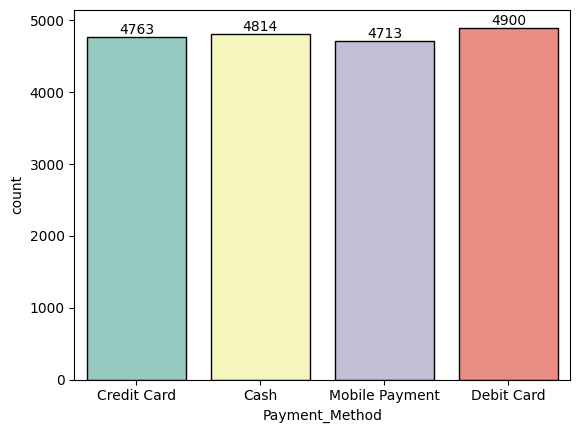

In [ ]:
sns.countplot(x= dataset['Payment_Method'],edgecolor='black',palette="Set3")
# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    # Get the height of the bar
    count = int(bar.get_height())
    # Add the count text at the center of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.1,            # Y-coordinate (just above the bar)
        f'{count}',                        # Text (the count)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10                        # Font size
    )

plt.show()

Key Insigts from this analysis:


*   Debit cards are most commonly used in high value transactions




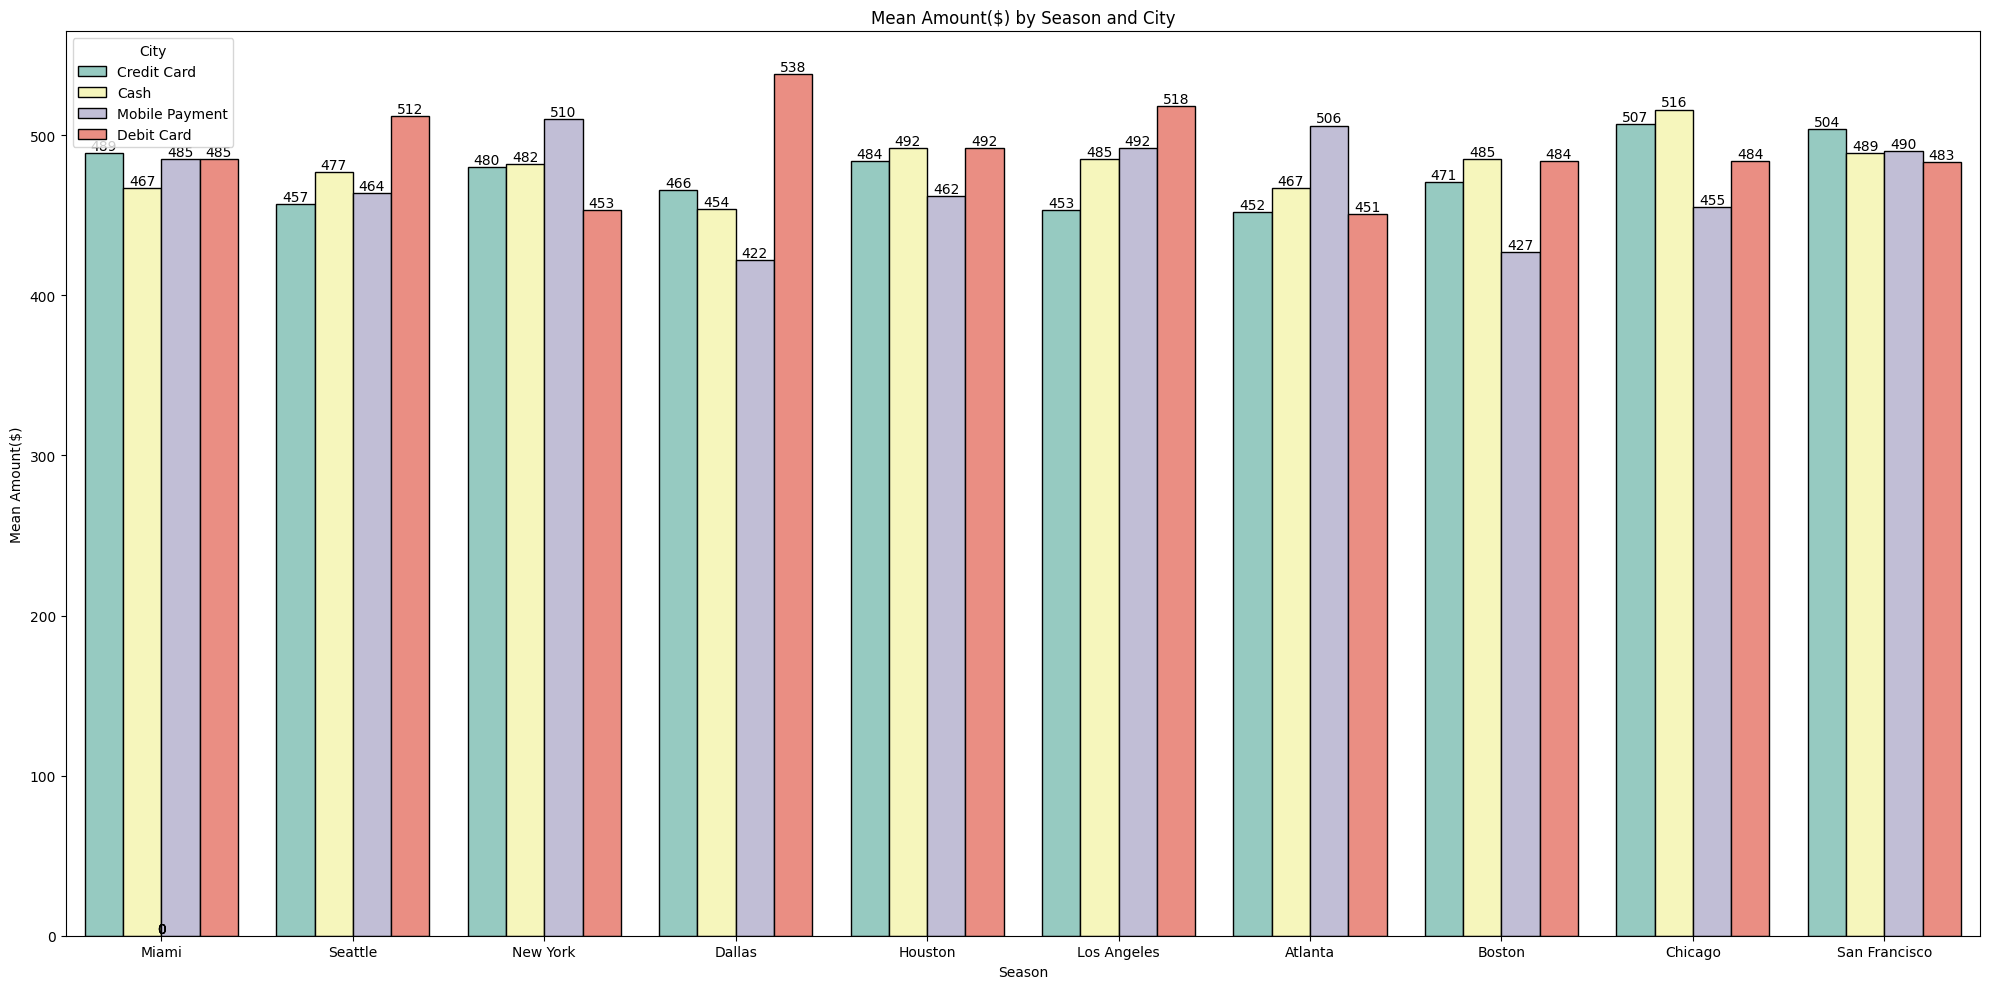

In [ ]:
# Create the bar plot with 'Season' on the x-axis, 'Amount($)' on the y-axis, and 'City' as hue
plt.figure(figsize=(20, 10))
sns.countplot(data=dataset, x=dataset['City'], hue='Payment_Method', edgecolor='black', palette='Set3')
# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    # Get the height of the bar
    count = int(bar.get_height())
    # Add the count text at the center of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.1,            # Y-coordinate (just above the bar)
        f'{count}',                        # Text (the count)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10                        # Font size
    )
# Add plot details
plt.title('Mean Amount($) by Season and City')
plt.xlabel('Season')
plt.ylabel('Mean Amount($)')
plt.legend(title='City')
plt.tight_layout()
plt.show()

Key Insigts from this analysis:


*   Mobile Payments are popular in New York and Atalanta
*   Debit card recorded the highest usage as a payment method considering all states which is in the state of Dallas. Mobile payment recorded the lowest usage as a payment method considering all states which is in the state of Dallas as well.
*   Dallas has the overall higest discrepancy in the adoption of payment methods. It has a standard deviation of 48.98 which is almost twice as much as any other state.
*   Miami and San Francisco has the overall lowest discrepancy in the adoption of payment methods.

*   San Francisco has the highest mean amount of sales while Boston has the lowest mean amount of sales.








In [ ]:
dataset = pd.read_excel('/content/transactions.xlsx')
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")

In [ ]:
discount_sales = dataset.groupby('Discount_Applied')["Discount_Applied"].count()
print(discount_sales)

Discount_Applied
False    19067
True     19433
Name: Discount_Applied, dtype: int64


**part-1**

   Discount_Applied   Amount($)
0             False   997482.88
1              True  1022221.08


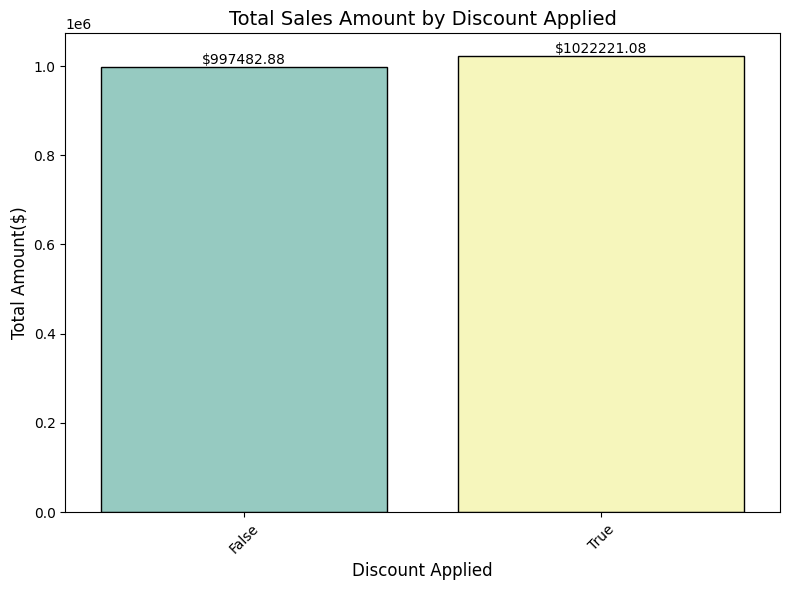

In [ ]:
# Group by 'Discount_Applied' and calculate the sum of 'Amount($)'
discount_sales_Amount = dataset.groupby('Discount_Applied')["Amount($)"].sum().reset_index()
print(discount_sales_Amount)


# Create the barplot
plt.figure(figsize=(8,6))
sns.barplot(x='Discount_Applied', y='Amount($)',  edgecolor='black', palette='Set3',data=discount_sales_Amount)

# Display the value above each bar
for i, v in enumerate(discount_sales_Amount['Amount($)']):
    plt.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot (Optional)
plt.title('Total Sales Amount by Discount Applied', fontsize=14)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Total Amount($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()

Key Insight:


*   Total Sales Amount is 24739 $ higher when discount is applied so it's a very significant amount.




**part-2**

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.to_period('M')
print(dataset["Month"])

0        2022-09
1        2022-01
2        2022-10
3        2024-04
4        2021-05
          ...   
38495    2021-03
38496    2022-12
38497    2020-08
38498    2020-10
38499    2022-12
Name: Month, Length: 38500, dtype: period[M]


In [ ]:
dataset_month_Amount = dataset.groupby('Month')["Amount($)"].sum()
print(dataset_month_Amount)

Month
2020-01    36260.81
2020-02    37970.14
2020-03    43653.14
2020-04    38209.02
2020-05    39099.05
2020-06    40491.69
2020-07    41601.15
2020-08    39226.44
2020-09    34967.18
2020-10    38364.87
2020-11    38628.42
2020-12    40192.15
2021-01    38099.90
2021-02    35462.86
2021-03    40970.81
2021-04    36748.78
2021-05    35836.50
2021-06    34618.10
2021-07    40666.25
2021-08    38748.95
2021-09    36243.14
2021-10    39847.66
2021-11    36731.17
2021-12    40342.86
2022-01    39111.48
2022-02    36441.52
2022-03    38647.54
2022-04    37379.17
2022-05    39805.50
2022-06    37563.49
2022-07    38240.91
2022-08    37958.65
2022-09    38414.21
2022-10    37873.54
2022-11    37033.49
2022-12    40827.63
2023-01    39216.23
2023-02    34431.16
2023-03    42171.03
2023-04    39029.64
2023-05    37598.32
2023-06    36924.39
2023-07    38773.92
2023-08    39833.41
2023-09    37531.80
2023-10    39572.03
2023-11    40530.20
2023-12    38278.88
2024-01    41079.51
2024-02    341

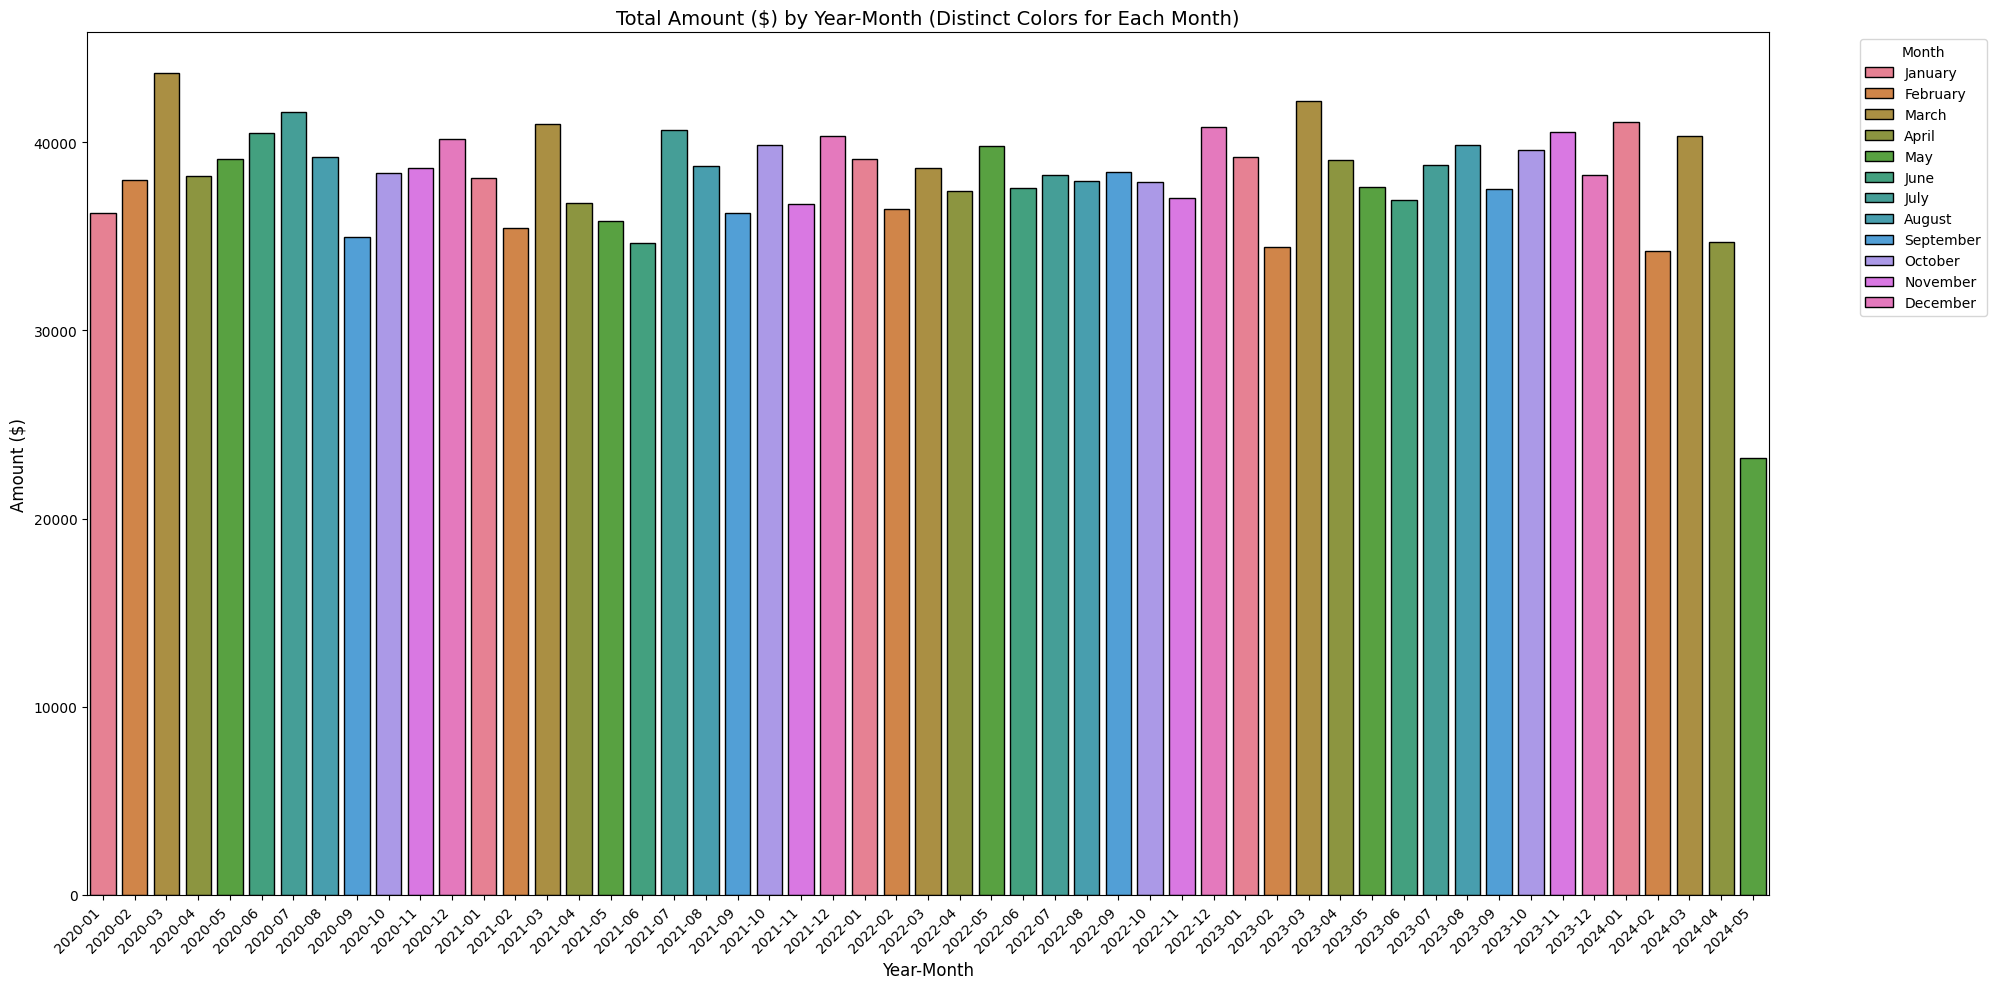

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime and create 'Month' and 'Year-Month' columns
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year-Month'] = dataset['Date'].dt.to_period('M').astype(str)  # Includes year and month
dataset['Month'] = dataset['Date'].dt.month_name()  # Extract month name for coloring

# Group by 'Year-Month' and calculate the total 'Amount($)'
year_month_amount = dataset.groupby(['Year-Month', 'Month'])["Amount($)"].sum().reset_index()

# Assign unique colors to each month using a consistent color palette
calendar_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
palette = sns.color_palette("husl", len(calendar_months))  # "husl" provides distinct colors
month_colors = dict(zip(calendar_months, palette))

# Plotting using seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(
    x=year_month_amount['Year-Month'],
    y=year_month_amount['Amount($)'],
    hue=year_month_amount['Month'],
    palette=month_colors,
    dodge=False,
    edgecolor='black'
)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Total Amount ($) by Year-Month (Distinct Colors for Each Month)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

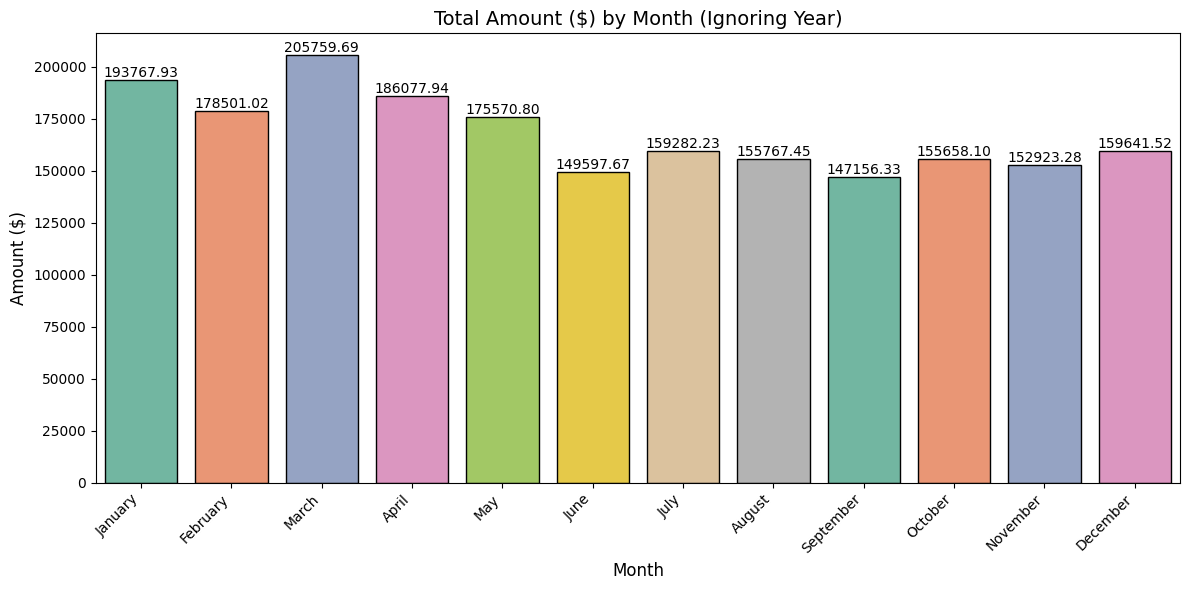

In [ ]:
# Ensure 'Date' is in datetime format and extract the month name
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month_Name'] = dataset['Date'].dt.month_name()

# Group by 'Month_Name' and calculate the total 'Amount($)'
monthly_amount_no_year = dataset.groupby('Month_Name')["Amount($)"].sum()

# Reorder months to follow the calendar order
calendar_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_amount_no_year = monthly_amount_no_year.reindex(calendar_months)

# Plotting using seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_amount_no_year.index, y=monthly_amount_no_year.values, edgecolor='black', palette='Set2')

# Annotate each bar with its value
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    value = float(bar.get_height())  # Get the height of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height() + 0.02,            # Y-coordinate (just above the bar)
        f'{value:.2f}',                     # Text (the value)
        ha='center', va='bottom',          # Alignment
        fontsize=10                         # Font size
    )

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Total Amount ($) by Month (Ignoring Year)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Key Insights:


*   The highest sales recorded is during March which is a sharp increase from the month of February
*   The sales amount drops drastically from March up till June and the sharpest transition takes place from May to June.
*   During July and August the sales rise to a degree but still inferior compared the March to May prices.
*   September marks the lowest sales recorded.
*   The sales again show a significant rise for the October to January period. The sales show a sharp increase during the transition from December to January. There might be factors such as Black Friday or Christmas Sale which impacts this.
*   The sales significantly fall during the January to February Transition.







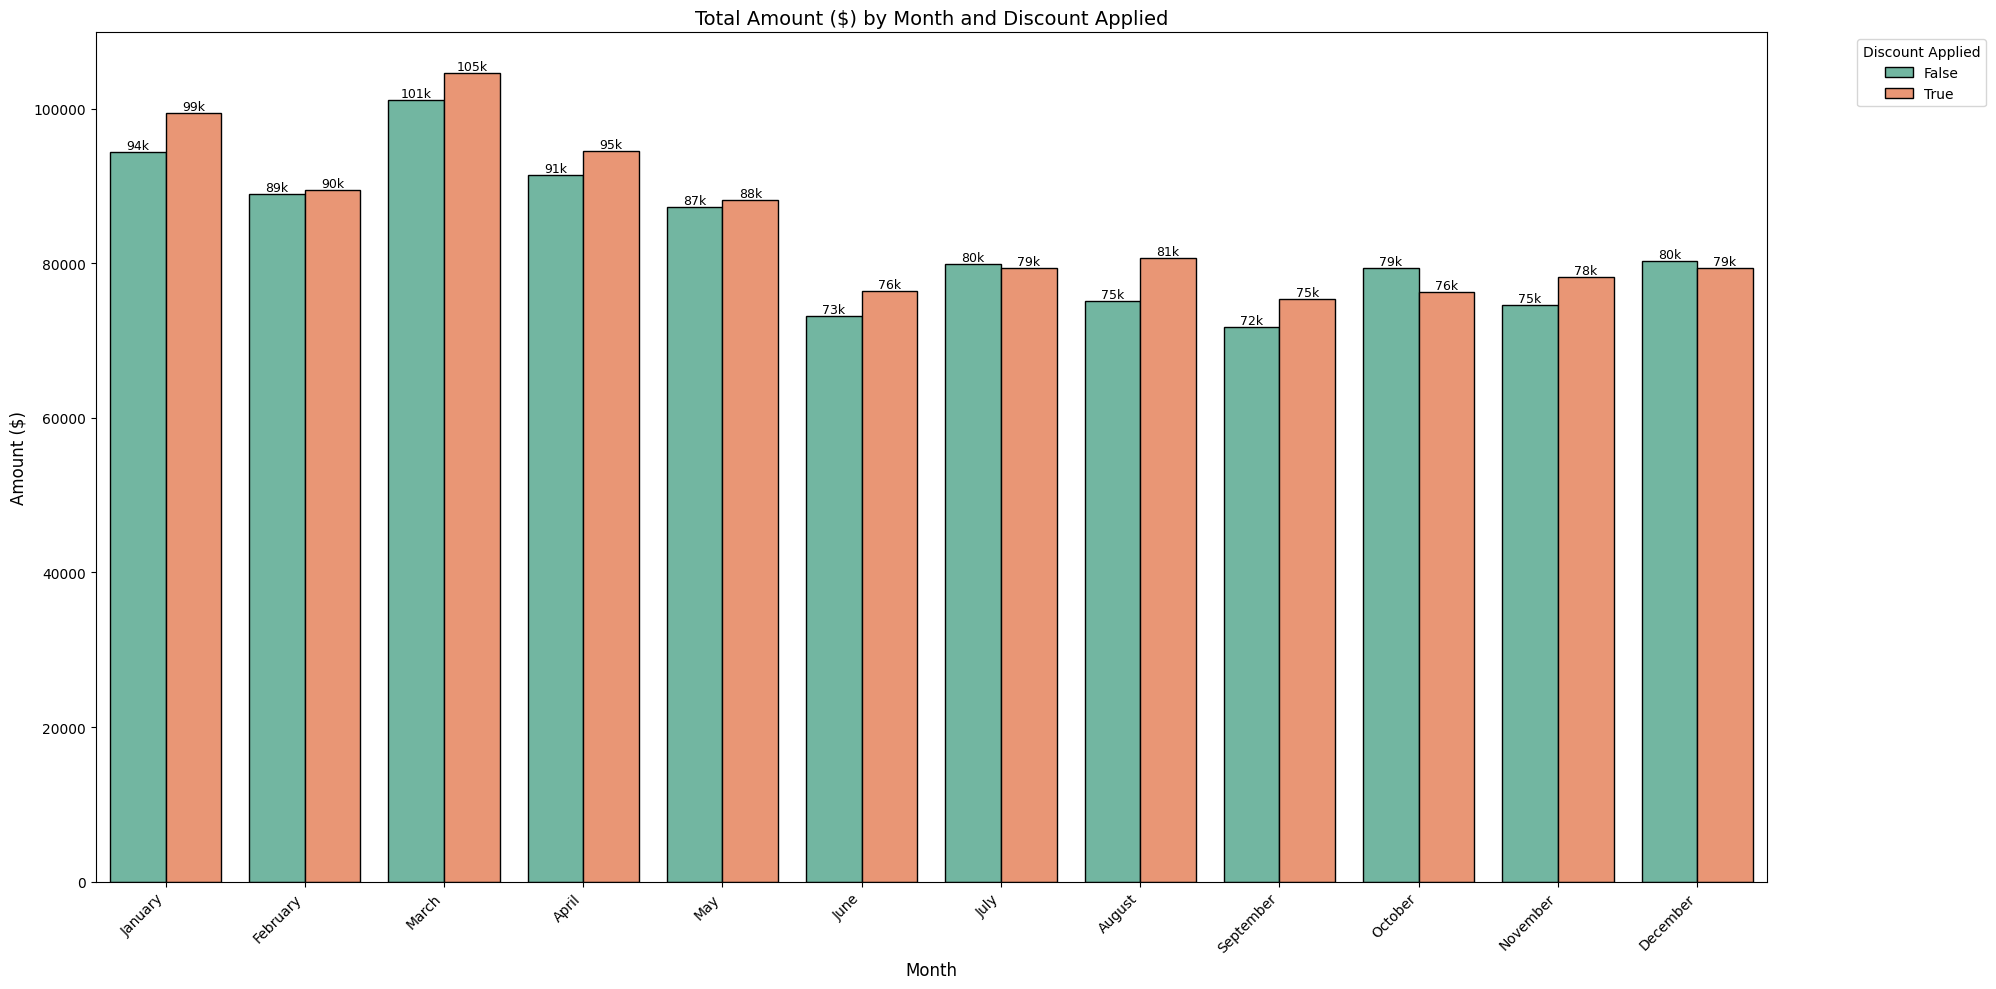

In [ ]:
# Group by 'Month_Name' and 'Discount_Applied', calculate the total 'Amount($)'
monthly_discount_amount = dataset.groupby(['Month_Name', 'Discount_Applied'])['Amount($)'].sum().unstack()

# Reorder months to follow the calendar order
monthly_discount_amount = monthly_discount_amount.reindex(calendar_months)

# Reset index for easier plotting with Seaborn
monthly_discount_amount.reset_index(inplace=True)
monthly_discount_amount = monthly_discount_amount.fillna(0)  # Replace NaNs with 0

# Melt the DataFrame to reshape it for Seaborn
melted_data_discount = monthly_discount_amount.melt(
    id_vars='Month_Name', var_name='Discount_Applied', value_name='Amount($)'
)

# Plotting using Seaborn
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(
    data=melted_data_discount,
    x='Month_Name',
    y='Amount($)',
    hue='Discount_Applied',
    edgecolor='black',
    palette='Set2'
)

# Adding values on top of the bars
for bar in bar_plot.patches:
    value = bar.get_height()  # Get the height of the bar
    if value > 0:  # Only annotate bars with values greater than 0
        bar_plot.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
            bar.get_height() + 0.02,           # Y-coordinate (just above the bar)
            format_number(value),              # Formatted value
            ha='center', va='bottom',         # Alignment
            fontsize=9                         # Font size
        )

# Adding labels and title
plt.title('Total Amount ($) by Month and Discount Applied', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Discount Applied', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Key Insights:

*   During February, July, May and December the presence of discount does not have any significant impact on sales amounts.

*   Only in the month of October the sales amount without discount is unexpectedly higher than the sales with discount.

*  The 7 other months of the year, the sales amount with discount have been higher compared to without discounted products. But if we consider the extremes then 9 out of 12 months have more sales with discount applied than without it.







**Part-3**

City
Chicago    5.547601
Houston    5.530272
Miami      5.521909
Name: Total_Items, dtype: float64


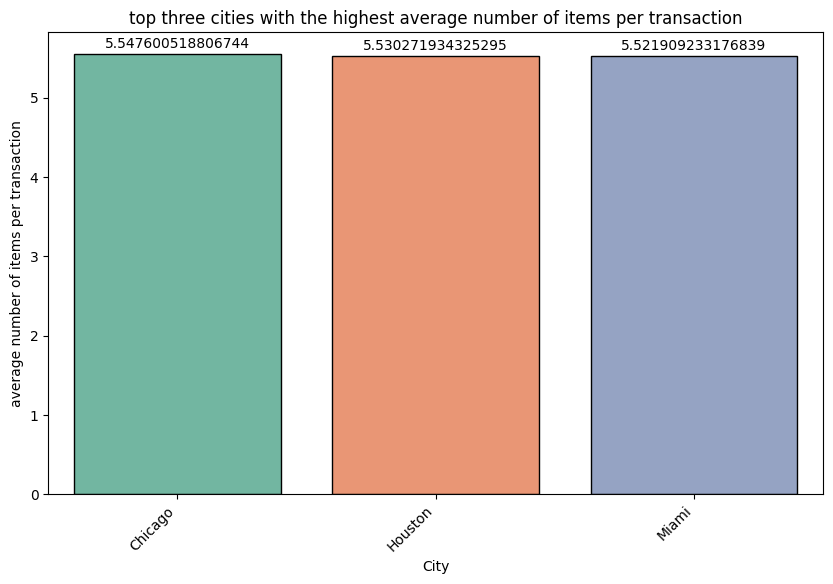

In [ ]:
dataset = pd.read_excel('/content/transactions.xlsx')
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")



dataset_city = dataset.groupby('City')["Total_Items"].mean()
dataset_city.sort_values(ascending=False,inplace=True)
print(dataset_city[0:3])

plt.figure(figsize=(10, 6))

sns.barplot(x=dataset_city.index[0:3],y=dataset_city.values[0:3],edgecolor='black',palette='Set2')  #taking top 3 cities into consideration

# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    # Get the height of the bar
    count = float(bar.get_height())
    # Add the count text at the center of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.04,            # Y-coordinate (just above the bar)
        f'{count}',                        # Text (the count)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10                        # Font size
    )
# Adding labels and title
plt.title('top three cities with the highest average number of items per transaction')
plt.xlabel('City')
plt.ylabel('average number of items per transaction')

plt.xticks(rotation=45, ha='right')

plt.show()

Key Insights:
*   The highest average transactions of the top 3 cities are approximately close. They are in the 5.5 range.



In [ ]:
dataset_city = dataset.groupby('City')["Total_Items"].mean()
dataset_city.sort_values(ascending=False,inplace=True)
print(dataset_city[0:3])

City
Chicago    5.547601
Houston    5.530272
Miami      5.521909
Name: Total_Items, dtype: float64


**Part-4**

In [ ]:
city_with_max_item = []
for i in dataset_city.index[0:3]:
  city_with_max_item.append(i)
print(city_with_max_item)
filtered_dataset = dataset[dataset['City'].isin(city_with_max_item)]
#print(filtered_dataset)
filtered_dataset_grouped = filtered_dataset.groupby('City')["Amount($)"].sum()
print(filtered_dataset)


['Chicago', 'Houston', 'Miami']
       Transaction_ID                 Date      Customer_Name  Total_Items  \
0          1000667075  2022-09-12 17:40:23         David King            5   
2          1000681674  2022-10-15 07:49:59      Chelsea Garza            7   
4          1000328702  2021-05-28 04:16:54      Crystal Adams            4   
12         1000675909  2022-11-07 15:39:11         Tara Jones           10   
21         1000795581  2023-06-23 00:31:08  Rebecca Mcfarland            7   
...               ...                  ...                ...          ...   
38492      1000284996  2023-01-30 17:28:52       Jaime Hurley            8   
38494      1000447585  2023-10-05 21:27:32    Steven Mcdaniel            1   
38495      1000601955  2021-03-03 23:22:59     Diane Robinson            7   
38497      1000411981  2020-08-31 00:48:14           Anna Lee            9   
38499      1000182671  2022-12-12 01:11:10      Nicole Pierce            3   

       Amount($) Payment_Method

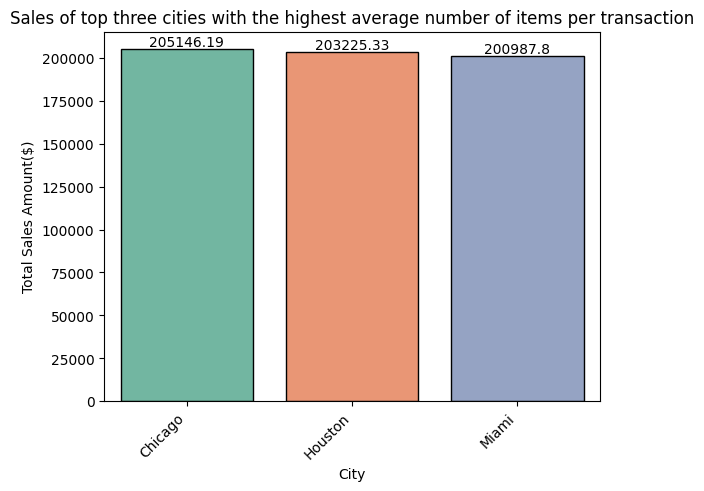

In [ ]:
sns.barplot(x=filtered_dataset_grouped.index,y=filtered_dataset_grouped.values ,edgecolor='black',palette='Set2')

# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    # Get the height of the bar
    count = float(bar.get_height())
    # Add the count text at the center of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.04,            # Y-coordinate (just above the bar)
        f'{count}',                        # Text (the count)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10                        # Font size
    )


# Adding labels and title
plt.title('Sales of top three cities with the highest average number of items per transaction')
plt.xlabel('City')
plt.ylabel('Total Sales Amount($)')

plt.xticks(rotation=45, ha='right')

plt.show()

Key Insights:


*   The Sales diffences between the cities are only around 1% of the total sales.




       Transaction_ID                 Date      Customer_Name  Total_Items  \
0          1000667075  2022-09-12 17:40:23         David King            5   
2          1000681674  2022-10-15 07:49:59      Chelsea Garza            7   
4          1000328702  2021-05-28 04:16:54      Crystal Adams            4   
12         1000675909  2022-11-07 15:39:11         Tara Jones           10   
21         1000795581  2023-06-23 00:31:08  Rebecca Mcfarland            7   
...               ...                  ...                ...          ...   
38492      1000284996  2023-01-30 17:28:52       Jaime Hurley            8   
38494      1000447585  2023-10-05 21:27:32    Steven Mcdaniel            1   
38495      1000601955  2021-03-03 23:22:59     Diane Robinson            7   
38497      1000411981  2020-08-31 00:48:14           Anna Lee            9   
38499      1000182671  2022-12-12 01:11:10      Nicole Pierce            3   

       Amount($) Payment_Method     City         Store_Type  Di

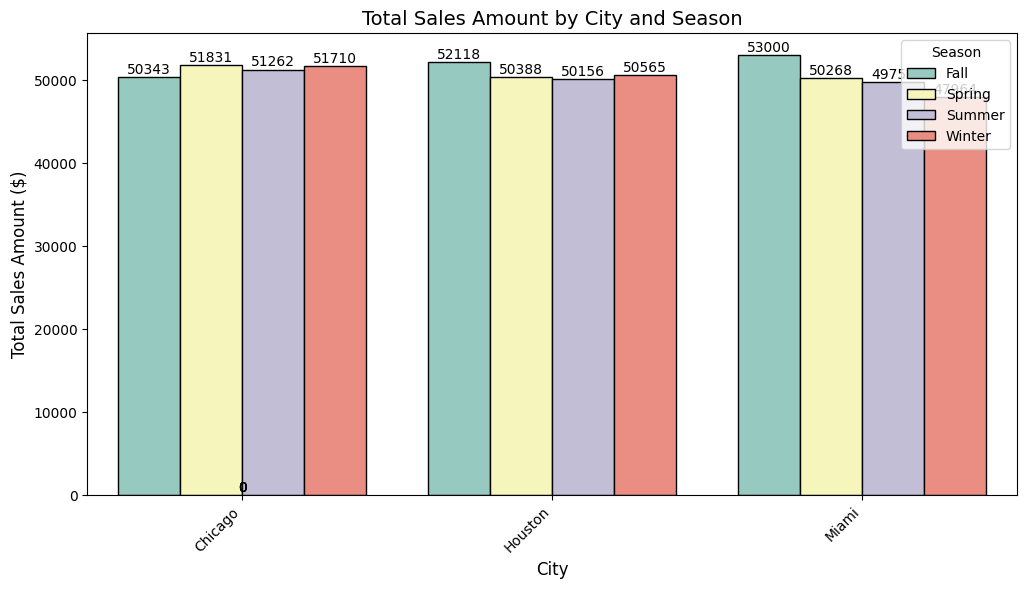

In [ ]:
filtered_dataset_grouped = filtered_dataset.groupby(['City','Season'])["Amount($)"].sum()
print(filtered_dataset)


grouped_data = filtered_dataset_grouped.reset_index()

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Amount($)', hue='Season', data=grouped_data, edgecolor='black',palette='Set3')

# Add annotations to each bar
ax = plt.gca()
for bar in ax.patches:
    sales = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        sales + 50,  # Adjust height for annotation
        f'{sales:.0f}',
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.title('Total Sales Amount by City and Season', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season', fontsize=10)

plt.show()

Key Insights:
*   Houston and Miami has significantly high sales amount during Fall whereas Chicago has the lowest during Fall.
*   The deviation of sales amount is highest in Miami season wise.
*   Compared to Chicago and Houston only Miami has the lowest sell in Winter.






**Part-5**

Promotion
BOGO (Buy One Get One)        671969.16
Discount on Selected Items    669446.97
None                          678287.83
Name: Amount($), dtype: float64


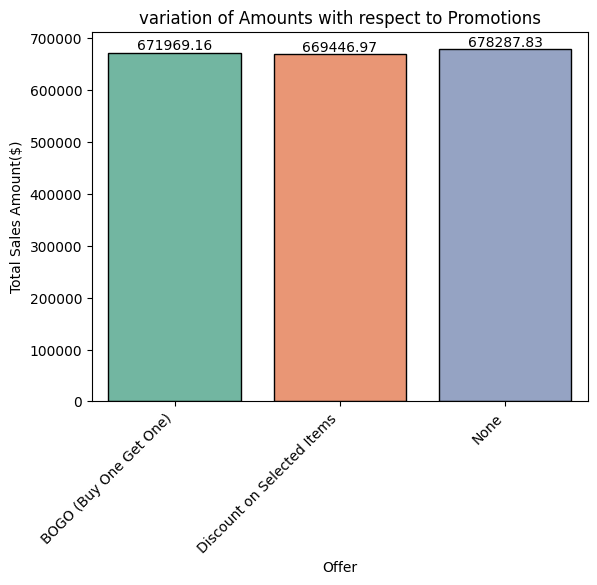

In [ ]:
dataset = pd.read_excel('/content/transactions.xlsx')
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")


filtered_dataset_grouped = dataset.groupby("Promotion")["Amount($)"].sum()
print(filtered_dataset_grouped)

sns.barplot(x=filtered_dataset_grouped.index,y=filtered_dataset_grouped.values,edgecolor='black',palette='Set2')

# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    # Get the height of the bar
    count = float(bar.get_height())
    # Add the count text at the center of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.04,            # Y-coordinate (just above the bar)
        f'{count}',                        # Text (the count)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10                        # Font size
    )


# Adding labels and title
plt.title('variation of Amounts with respect to Promotions')
plt.xlabel('Offer')
plt.ylabel('Total Sales Amount($)')

plt.xticks(rotation=45, ha='right')

plt.show()

Key Insights:

*   BOGO offers have slightly high amount of sales compared to discounts on selected items.
*   One third of the total transactions have no kind of promotions







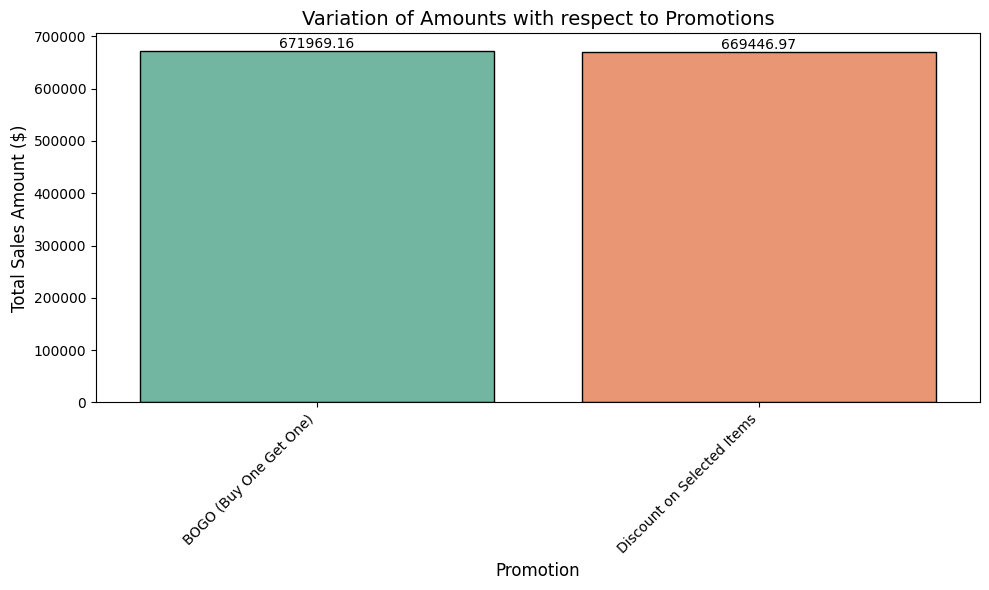

In [ ]:
# Fill missing values in 'Promotion'
dataset['Promotion'] = dataset['Promotion'].fillna(value="None")

# Filter dataset for only "BOGO" and "Discount on Selected Items"
filtered_dataset = dataset[dataset['Promotion'].isin(['BOGO (Buy One Get One)', 'Discount on Selected Items'])]

# Group by 'Promotion' and sum 'Amount($)'
filtered_dataset_grouped = filtered_dataset.groupby("Promotion")["Amount($)"].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_dataset_grouped.index, y=filtered_dataset_grouped.values, edgecolor='black', palette='Set2')

# Annotate each bar with its count
ax = plt.gca()  # Get the current axes
for bar in ax.patches:
    count = float(bar.get_height())
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.04,            # Y-coordinate (just above the bar)
        f'{count:.2f}',                     # Text (the count)
        ha='center', va='bottom',          # Alignment
        fontsize=10                         # Font size
    )

# Adding labels and title
plt.title('Variation of Amounts with respect to Promotions', fontsize=14)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Key Insights:

*   The total sales amount from BOGO and Selective discount is very identical with only 0.37% difference.




       Transaction_ID                 Date       Customer_Name  Total_Items  \
0          1000667075  2022-09-12 17:40:23          David King            5   
1          1000156022  2022-01-20 23:03:20  Michael Williamson            3   
2          1000681674  2022-10-15 07:49:59       Chelsea Garza            7   
3          1000692089  2024-04-05 09:39:58         Scott Lopez            5   
5          1000269743  2023-09-04 10:40:50        Michael Rowe            2   
...               ...                  ...                 ...          ...   
38494      1000447585  2023-10-05 21:27:32     Steven Mcdaniel            1   
38495      1000601955  2021-03-03 23:22:59      Diane Robinson            7   
38497      1000411981  2020-08-31 00:48:14            Anna Lee            9   
38498      1000973918  2020-10-22 22:58:46        Regina Smith            2   
38499      1000182671  2022-12-12 01:11:10       Nicole Pierce            3   

       Amount($)  Payment_Method         City      

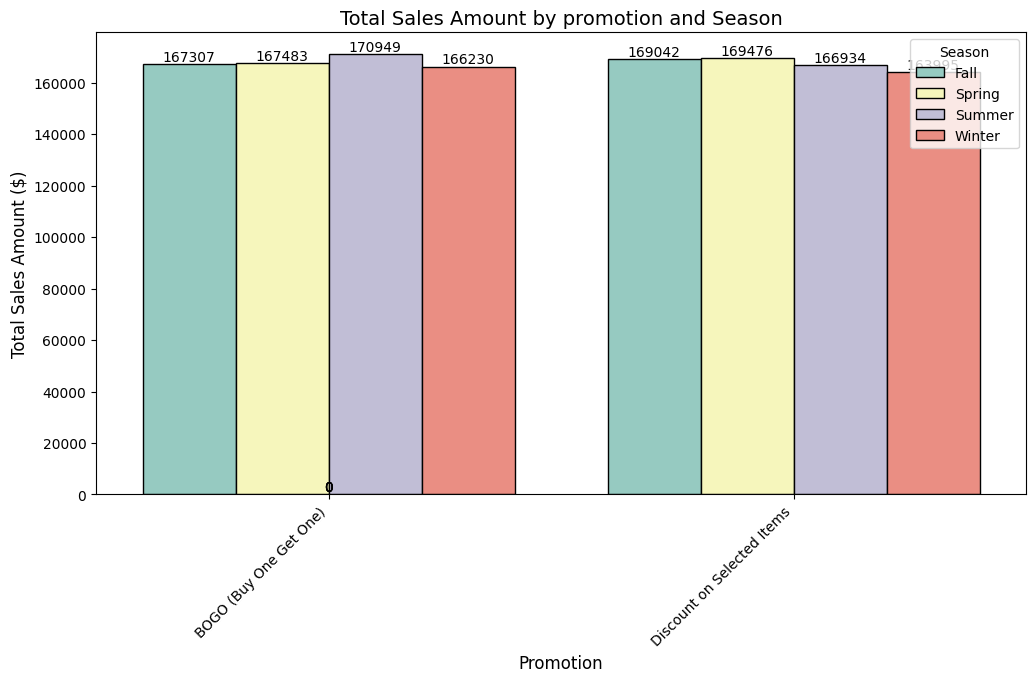

In [ ]:
filtered_dataset_grouped = filtered_dataset.groupby(['Promotion','Season'])["Amount($)"].sum()
print(filtered_dataset)


grouped_data = filtered_dataset_grouped.reset_index()

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Promotion', y='Amount($)', hue='Season', data=grouped_data, edgecolor='black', palette='Set3')

# Add annotations to each bar
ax = plt.gca()
for bar in ax.patches:
    sales = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        sales + 50,  # Adjust height for annotation
        f'{sales:.0f}',
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.title('Total Sales Amount by promotion and Season', fontsize=14)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season', fontsize=10)

plt.show()

Key Insights:

*   BOGO offers have shown remarkable success during Summer seasons.
*   Selective discounts boost sales remarkably during fall and spring.
*   All kinds of promotions perform quite poor in winter. So they are not appropriate for winter sales.



